In [1]:
import sys
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install lxml

In [2]:
import urllib.request

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [4]:
url = page = urllib.request.urlopen(url)

In [5]:
from bs4 import BeautifulSoup

In [6]:
soup = BeautifulSoup(page, "lxml")

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"4dcdaf26-ecd4-4cce-967d-5c73c40b423e","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":960187814,"wgRevisionId":960187814,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toron

In [8]:
all_tables=soup.find_all("table")

In [9]:
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td>

In [10]:
A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

In [11]:
import pandas as pd

In [12]:
df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough']=B
df['Neighborhood']=C
df

,PostalCode,Borough,Neighborhood
0,M1A\n,Not assigned\n,Not assigned\n
1,M2A\n,Not assigned\n,Not assigned\n
2,M3A\n,North York\n,Parkwoods\n
3,M4A\n,North York\n,Victoria Village\n
4,M5A\n,Downtown Toronto\n,"Regent Park, Harbourfront\n"
...,...,...,...
175,M5Z\n,Not assigned\n,Not assigned\n
176,M6Z\n,Not assigned\n,Not assigned\n
177,M7Z\n,Not assigned\n,Not assigned\n
178,M8Z\n,Etobicoke\n,"Mimico NW, The Queensway West, South of Bloor,..."


In [13]:
df['Neighborhood'] = df['Neighborhood'].replace('\n','', regex=True)
df['Borough'] = df['Borough'].replace('\n','', regex=True)
df['PostalCode'] = df['PostalCode'].replace('\n','', regex=True)
df

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [14]:
df = df.drop(df[df.Borough == "Not assigned"].index)
df

,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [15]:
df.loc[df['Neighborhood'] == "Not assigned"]

,PostalCode,Borough,Neighborhood


In [16]:
df_PC = pd.DataFrame(df['PostalCode'].value_counts())
df_PCunic = df_PC[df_PC['PostalCode'] > 1] 
df_PCunic


,PostalCode


In [17]:
df_clean = df.reset_index(drop=True)
df_clean

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [18]:
df_clean.shape

(103, 3)

In [19]:
!{sys.executable} -m pip install geocoder
import geocoder

In [20]:
long_l = []
lat_l = []

for i in df_clean['PostalCode']:
    print(i) #This print the currently processed Postal Code to identify easily were could be potential error
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(i))
        lat_lng_coords = g.latlng
    lat_l.append(lat_lng_coords[0])
    long_l.append(lat_lng_coords[1])

M3A
M4A
M5A
M6A
M7A
M9A
M1B
M3B
M4B
M5B
M6B
M9B
M1C
M3C
M4C
M5C
M6C
M9C
M1E
M4E
M5E
M6E
M1G
M4G
M5G
M6G
M1H
M2H
M3H
M4H
M5H
M6H
M1J
M2J
M3J
M4J
M5J
M6J
M1K
M2K
M3K
M4K
M5K
M6K
M1L
M2L
M3L
M4L
M5L
M6L
M9L
M1M
M2M
M3M
M4M
M5M
M6M
M9M
M1N
M2N
M3N
M4N
M5N
M6N
M9N
M1P
M2P
M4P
M5P
M6P
M9P
M1R
M2R
M4R
M5R
M6R
M7R
M9R
M1S
M4S
M5S
M6S
M1T
M4T
M5T
M1V
M4V
M5V
M8V
M9V
M1W
M4W
M5W
M8W
M9W
M1X
M4X
M5X
M8X
M4Y
M7Y
M8Y
M8Z


In [21]:
df_lat_l = pd.DataFrame(lat_l, columns=['Latitude'])

df_long_l = pd.DataFrame(long_l, columns=['Longitude'])

toronto_data = pd.concat([df_clean, df_lat_l, df_long_l], axis=1)
toronto_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.752935,-79.335641
1,M4A,North York,Victoria Village,43.728102,-79.311890
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723265,-79.451211
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653340,-79.509766
99,M4Y,Downtown Toronto,Church and Wellesley,43.666659,-79.381472
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.648700,-79.385450
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.632798,-79.493017


In [24]:
import numpy as np 

import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map  library

print('Libraries imported.')

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - folium=0.5.0


The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1
  branca             conda-forge/noarch::branca-0.4.1-py_0
  folium             conda-forge/noarch::folium-0.5.0-py_0
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m
  vincent            conda-forge/noarch::vincent-0.4.4-py_1

The following packages will be UPDATED:

  conda                      pkgs/main::conda-4.7.12-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi                                         pkgs/main --> conda-forge


Preparing transaction: ...working... done
Verifying transaction: ...working... failed
Libraries im



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [23]:
toronto_data.loc[4, 'Neighborhood']

"Queen's Park, Ontario Provincial Government"

In [25]:
neighborhood_latitude = toronto_data.loc[4, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_data.loc[4, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_data.loc[4, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Queen's Park, Ontario Provincial Government are 43.66179000000005, -79.38938999999993.


In [26]:
CLIENT_ID = '5AMXYAH0V0FJWVATAMS3USTNCV2KIO5GN31M0CVXK3CFFCFH'
CLIENT_SECRET='EM3AWO3UYXZL1KZGKWRVWZ1RWGIBXDSLYX34NMW52NEBIJLB'

In [27]:
latitude = neighborhood_latitude
longitude = neighborhood_longitude
VERSION = '20180605' 
search_query = neighborhood_name
radius = 500
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

"https://api.foursquare.com/v2/venues/explore?client_id=5AMXYAH0V0FJWVATAMS3USTNCV2KIO5GN31M0CVXK3CFFCFH&client_secret=EM3AWO3UYXZL1KZGKWRVWZ1RWGIBXDSLYX34NMW52NEBIJLB&ll=43.66179000000005,-79.38938999999993&v=20180605&query=Queen's Park, Ontario Provincial Government&radius=500&limit=100"

In [28]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee8e4705f782d71690bee6d'},
 'response': {'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': "queen's park ontario provincial government",
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 43.666290004500055,
    'lng': -79.38318122156429},
   'sw': {'lat': 43.65728999550005, 'lng': -79.39559877843558}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b9d206bf964a520e69136e3',
       'name': "Queen's Park",
       'location': {'address': 'University Ave.',
        'crossStreet': 'at Wellesley Ave.',
        'lat': 43.66394609897775,
        'lng': -79.39217952520835,
        'labeledLatLngs': [{'label': 'display',
          

In [29]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) 


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Queen's Park,Park,43.663946,-79.392180
1,Queen’s Park Veterans' Memorial,Monument / Landmark,43.661458,-79.391333
2,Ontario Fire Fighters Memorial,Sculpture Garden,43.660335,-79.389921
3,Queen's Park Subway Station,Metro Station,43.660006,-79.390272


In [31]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
radius = 500
LIMIT = 100
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [35]:
print(toronto_venues.shape)
toronto_venues.head()

(2271, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.752935,-79.335641,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.752935,-79.335641,GTA Restoration,43.753396,-79.333477,Fireworks Store
2,Parkwoods,43.752935,-79.335641,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.728102,-79.311890,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.728102,-79.311890,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [36]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,2,2,2,2,2,2
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
...,...,...,...,...,...,...
"Willowdale, Willowdale West",6,6,6,6,6,6
Woburn,3,3,3,3,3,3
Woodbine Heights,13,13,13,13,13,13


In [37]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


In [38]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")


toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 


fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
toronto_onehot.shape

(2271, 269)

In [40]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
toronto_grouped.shape

(98, 269)

In [42]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
              venue  freq
0      Skating Rink   0.2
1    Breakfast Spot   0.2
2       Supermarket   0.2
3   Badminton Court   0.2
4  Sushi Restaurant   0.2


----Alderwood, Long Branch----
               venue  freq
0                Gym   0.1
1       Dance Studio   0.1
2     Sandwich Place   0.1
3  Convenience Store   0.1
4                Pub   0.1


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                       Bank  0.10
1                Coffee Shop  0.10
2              Grocery Store  0.05
3  Middle Eastern Restaurant  0.05
4              Deli / Bodega  0.05


----Bayview Village----
                        venue  freq
0  Construction & Landscaping   0.5
1                       Trail   0.5
2                 Yoga Studio   0.0
3                      Museum   0.0
4                Noodle House   0.0


----Bedford Park, Lawrence Manor East----
                 venue  freq
0          Coffee Shop  0.09
1       Sandwich Pl

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Supermarket,Badminton Court,Skating Rink,Sushi Restaurant,Fireworks Store,Film Studio,Fish & Chips Shop,Field,Eastern European Restaurant
1,"Alderwood, Long Branch",Pizza Place,Pub,Gas Station,Coffee Shop,Gym,Athletics & Sports,Dance Studio,Sandwich Place,Pharmacy,Convenience Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Bridal Shop,Pizza Place,Deli / Bodega,Diner,Restaurant,Sandwich Place,Mobile Phone Shop,Shopping Mall
3,Bayview Village,Construction & Landscaping,Trail,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Field,Dumpling Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Comfort Food Restaurant,Butcher,Café,Sports Club,Liquor Store,Sushi Restaurant,Restaurant


In [45]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

inertia=[]
N=51
for k in range(2,N):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
        inertia.append(kmeans.inertia_)

inertia

[18.012917436335133,
 16.787774164809484,
 16.01145159639779,
 15.360981260428437,
 14.360922170082489,
 13.410730686564404,
 12.518840244747102,
 11.732482240381577,
 11.187744992671906,
 10.696343482201412,
 10.226808702410905,
 10.078315304024304,
 9.665762533807507,
 9.081427416076867,
 8.885692913063082,
 8.282107474811916,
 8.160394343540608,
 7.62579155747339,
 7.58378151690297,
 7.240634673989222,
 7.0939281144225985,
 6.785054988600695,
 6.38240964615514,
 6.316256614460548,
 6.04250605957626,
 5.8284829244978695,
 5.592292718109308,
 5.3321410107855565,
 5.207899194447289,
 4.988376093746971,
 4.798437755955612,
 4.616830077541367,
 4.401435165600004,
 4.221564984277329,
 4.029236100523743,
 3.8435740311280764,
 3.6014584083460774,
 3.6183333192799982,
 3.4174744493896125,
 3.304538411053763,
 3.056453297081516,
 2.8971549317107548,
 2.7226587583374764,
 2.7014440182598105,
 2.570270806948537,
 2.3417544573027715,
 2.3317055579848516,
 2.1943688091677003,
 2.061876340416026]

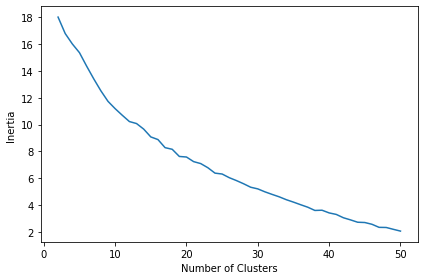

In [46]:
plt.plot(range(2,N),inertia)
plt.ylabel('Inertia ')
plt.xlabel('Number of Clusters')
plt.tight_layout()
plt.show()

In [47]:
kclusters = 2


k_means = KMeans(init="k-means++", n_clusters=kclusters, n_init=10, random_state=0)
k_means.fit(toronto_grouped_clustering)


k_means.labels_ 


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [48]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', k_means.labels_)

toronto_merged = toronto_data


toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() 

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.752935,-79.335641,0.0,Food & Drink Shop,Fireworks Store,Park,Farmers Market,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant
1,M4A,North York,Victoria Village,43.728102,-79.311890,1.0,Intersection,Pizza Place,Portuguese Restaurant,French Restaurant,Park,Coffee Shop,Women's Store,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041,1.0,Pub,Coffee Shop,Café,Athletics & Sports,Mexican Restaurant,Tech Startup,Bakery,Thai Restaurant,Theater,Bank
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723265,-79.451211,1.0,Clothing Store,Women's Store,Toy / Game Store,Restaurant,Men's Store,Food Court,Bookstore,Furniture / Home Store,Cosmetics Shop,American Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390,1.0,Coffee Shop,Café,Sushi Restaurant,Smoothie Shop,Italian Restaurant,Bookstore,Fried Chicken Joint,Creperie,Burrito Place,Yoga Studio


In [49]:
toronto_merged.loc[pd.isna(toronto_merged["Cluster Labels"]), :].index

Int64Index([95], dtype='int64')

In [50]:
toronto_merged.iloc[95,]

PostalCode                        M1X
Borough                   Scarborough
Neighborhood              Upper Rouge
Latitude                      43.8348
Longitude                    -79.2041
Cluster Labels                    NaN
1st Most Common Venue             NaN
2nd Most Common Venue             NaN
3rd Most Common Venue             NaN
4th Most Common Venue             NaN
5th Most Common Venue             NaN
6th Most Common Venue             NaN
7th Most Common Venue             NaN
8th Most Common Venue             NaN
9th Most Common Venue             NaN
10th Most Common Venue            NaN
Name: 95, dtype: object

In [51]:
pd.set_option('display.max_rows', None) #observe all rows
toronto_merged = toronto_merged.drop([95])
toronto_merged


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.752935,-79.335641,0.0,Food & Drink Shop,Fireworks Store,Park,Farmers Market,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant
1,M4A,North York,Victoria Village,43.728102,-79.311890,1.0,Intersection,Pizza Place,Portuguese Restaurant,French Restaurant,Park,Coffee Shop,Women's Store,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041,1.0,Pub,Coffee Shop,Café,Athletics & Sports,Mexican Restaurant,Tech Startup,Bakery,Thai Restaurant,Theater,Bank
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723265,-79.451211,1.0,Clothing Store,Women's Store,Toy / Game Store,Restaurant,Men's Store,Food Court,Bookstore,Furniture / Home Store,Cosmetics Shop,American Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390,1.0,Coffee Shop,Café,Sushi Restaurant,Smoothie Shop,Italian Restaurant,Bookstore,Fried Chicken Joint,Creperie,Burrito Place,Yoga Studio
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667481,-79.528953,0.0,Park,Baseball Field,Skating Rink,Fast Food Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Women's Store,Eastern European Restaurant
6,M1B,Scarborough,"Malvern, Rouge",43.808626,-79.189913,1.0,Trail,Women's Store,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Field,Dumpling Restaurant
7,M3B,North York,Don Mills,43.748900,-79.357220,1.0,Athletics & Sports,Burger Joint,Bank,Park,Other Great Outdoors,Restaurant,Trail,Coffee Shop,Farmers Market,Electronics Store
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.707193,-79.311529,1.0,Fast Food Restaurant,Pizza Place,Pharmacy,Pet Store,Gastropub,Breakfast Spot,Bank,Gym / Fitness Center,Athletics & Sports,Rock Climbing Spot
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529,1.0,Coffee Shop,Clothing Store,Middle Eastern Restaurant,Hotel,Italian Restaurant,Bar,Cosmetics Shop,Café,Bakery,Theater


In [56]:
clust1=toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[list(range(6, toronto_merged.shape[1]))]]

for ven in clust1.columns:    
    temp = clust1.loc[:,ven].value_counts().head()
    print("----"+ven+"----")
    print(temp)
    print('\n')

----1st Most Common Venue----
Park                 5
Playground           3
Convenience Store    2
Yoga Studio          1
Bakery               1
Name: 1st Most Common Venue, dtype: int64


----2nd Most Common Venue----
Park                                        5
Grocery Store                               3
Convenience Store                           2
Baseball Field                              2
Residential Building (Apartment / Condo)    1
Name: 2nd Most Common Venue, dtype: int64


----3rd Most Common Venue----
Park                    5
Pharmacy                2
Gym                     2
Theme Park              1
Ethiopian Restaurant    1
Name: 3rd Most Common Venue, dtype: int64


----4th Most Common Venue----
Park                    3
Gym / Fitness Center    2
Grocery Store           2
Farmers Market          1
Electronics Store       1
Name: 4th Most Common Venue, dtype: int64


----5th Most Common Venue----
Fast Food Restaurant    2
Ethiopian Restaurant    2
Electronics Store

In [57]:
clust1_melt = clust1.melt(var_name='columns', value_name='index')
clust1_melt['index'].value_counts().head()

Park                    20
Fast Food Restaurant    13
Farmers Market          13
Ethiopian Restaurant    12
Falafel Restaurant      12
Name: index, dtype: int64

In [58]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(6, toronto_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,Intersection,Pizza Place,Portuguese Restaurant,French Restaurant,Park,Coffee Shop,Women's Store,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant
2,"Regent Park, Harbourfront",Pub,Coffee Shop,Café,Athletics & Sports,Mexican Restaurant,Tech Startup,Bakery,Thai Restaurant,Theater,Bank
3,"Lawrence Manor, Lawrence Heights",Clothing Store,Women's Store,Toy / Game Store,Restaurant,Men's Store,Food Court,Bookstore,Furniture / Home Store,Cosmetics Shop,American Restaurant
4,"Queen's Park, Ontario Provincial Government",Coffee Shop,Café,Sushi Restaurant,Smoothie Shop,Italian Restaurant,Bookstore,Fried Chicken Joint,Creperie,Burrito Place,Yoga Studio
6,"Malvern, Rouge",Trail,Women's Store,Fast Food Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Field,Dumpling Restaurant
7,Don Mills,Athletics & Sports,Burger Joint,Bank,Park,Other Great Outdoors,Restaurant,Trail,Coffee Shop,Farmers Market,Electronics Store
8,"Parkview Hill, Woodbine Gardens",Fast Food Restaurant,Pizza Place,Pharmacy,Pet Store,Gastropub,Breakfast Spot,Bank,Gym / Fitness Center,Athletics & Sports,Rock Climbing Spot
9,"Garden District, Ryerson",Coffee Shop,Clothing Store,Middle Eastern Restaurant,Hotel,Italian Restaurant,Bar,Cosmetics Shop,Café,Bakery,Theater
10,Glencairn,Pizza Place,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Pub,Asian Restaurant,Gas Station,Sushi Restaurant,Grocery Store
11,"West Deane Park, Princess Gardens, Martin Grov...",Pizza Place,Sandwich Place,Tea Room,Chinese Restaurant,Farm,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant


In [59]:
clust2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[list(range(6, toronto_merged.shape[1]))]]

for ven in clust2.columns:    
    temp = clust2.loc[:,ven].value_counts().head()
    print("----"+ven+"----")
    print(temp)
    print('\n')

----1st Most Common Venue----
Coffee Shop       19
Pizza Place        9
Café               6
Discount Store     4
Bank               4
Name: 1st Most Common Venue, dtype: int64


----2nd Most Common Venue----
Coffee Shop      16
Café              6
Pizza Place       6
Women's Store     6
Hotel             5
Name: 2nd Most Common Venue, dtype: int64


----3rd Most Common Venue----
Field               7
Coffee Shop         5
Business Service    4
Café                4
Pharmacy            4
Name: 3rd Most Common Venue, dtype: int64


----4th Most Common Venue----
Restaurant              7
Electronics Store       7
Park                    4
Shopping Mall           4
Ethiopian Restaurant    3
Name: 4th Most Common Venue, dtype: int64


----5th Most Common Venue----
Café                     8
Ethiopian Restaurant     7
Vietnamese Restaurant    4
Falafel Restaurant       4
Electronics Store        4
Name: 5th Most Common Venue, dtype: int64


----6th Most Common Venue----
Falafel Restaurant  

In [60]:
clust2_melt = clust2.melt(var_name='columns', value_name='index')
clust2_melt['index'].value_counts().head()

Coffee Shop             56
Fast Food Restaurant    31
Café                    29
Pizza Place             26
Falafel Restaurant      26
Name: index, dtype: int64